# R-based method calibrations


In [1]:
data_path = '/data/parameter_estimation/'
file_path = paste(data_path, 'pbmc3k_final.rds', sep='')

In [2]:
file_path

[1] "/data/parameter_estimation/pbmc3k_final.rds"

### Load the dataset and shuffle the identities

In [3]:
library(Seurat)
pbmc <- readRDS(file =file_path)

In [291]:
levels(pbmc)

[1] "Naive CD4 T"  "Memory CD4 T" "CD14+ Mono"   "B"            "CD8 T"       
[6] "FCGR3A+ Mono" "NK"           "DC"           "Mk"

In [292]:
write.csv(pbmc[[]], '/data/parameter_estimation/pbmc3k_calibration/seurat_meta.csv')

converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



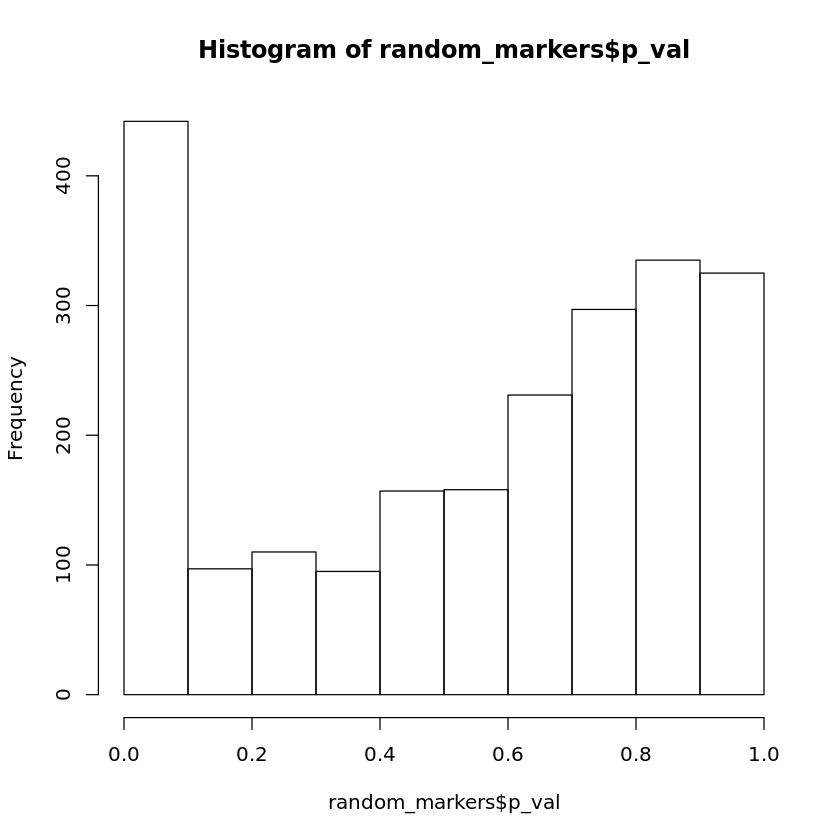

In [293]:
random_markers <- FindMarkers(
    pbmc, 
    ident.1 = 'Memory CD4 T', 
    ident.2 = 'Naive CD4 T',
    min.pct=0.1,
    test.use='DESeq2',
    logfc.threshold = 0.0)
hist(random_markers$p_val)

write.csv(random_markers, '/data/parameter_estimation/pbmc3k_calibration/cd4_deseq2.csv')

Assuming data assay in position 1, with name et is log-transformed.


Done!

Combining coefficients and standard errors

Warning message in melt(coefAndCI, as.is = TRUE):
“The melt generic in data.table has been passed a array and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(coefAndCI). In the next version, this warning will become an error.”
Calculating log-fold changes

Warning message in melt(lfc):
“The melt generic in data.table has been passed a list and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::

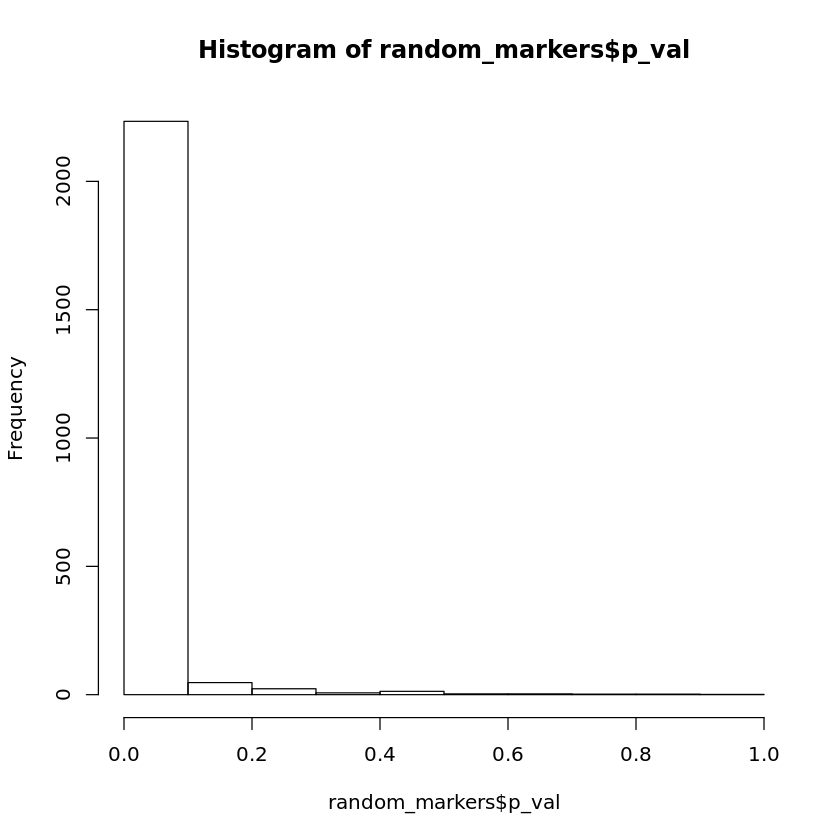

In [295]:
random_markers <- FindMarkers(
    pbmc, 
    ident.1 = 'Memory CD4 T', 
    ident.2 = 'Naive CD4 T',
    min.pct=0.1,
    test.use='MAST',
    logfc.threshold = 0.0)
hist(random_markers$p_val)
write.csv(random_markers, '/data/parameter_estimation/pbmc3k_calibration/cd4_MAST.csv')

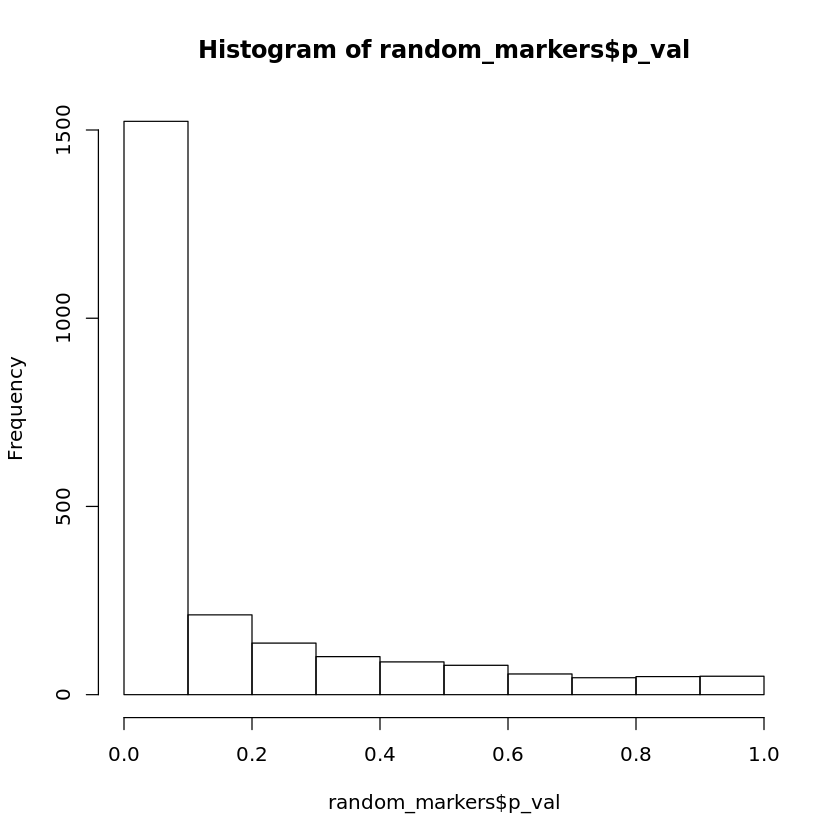

In [296]:
random_markers <- FindMarkers(
    pbmc, 
    ident.1 = 'Memory CD4 T', 
    ident.2 = 'Naive CD4 T',
    min.pct=0.1,
    test.use='wilcox',
    logfc.threshold = 0.0)
hist(random_markers$p_val)
write.csv(random_markers, '/data/parameter_estimation/pbmc3k_calibration/cd4_wilcox.csv')

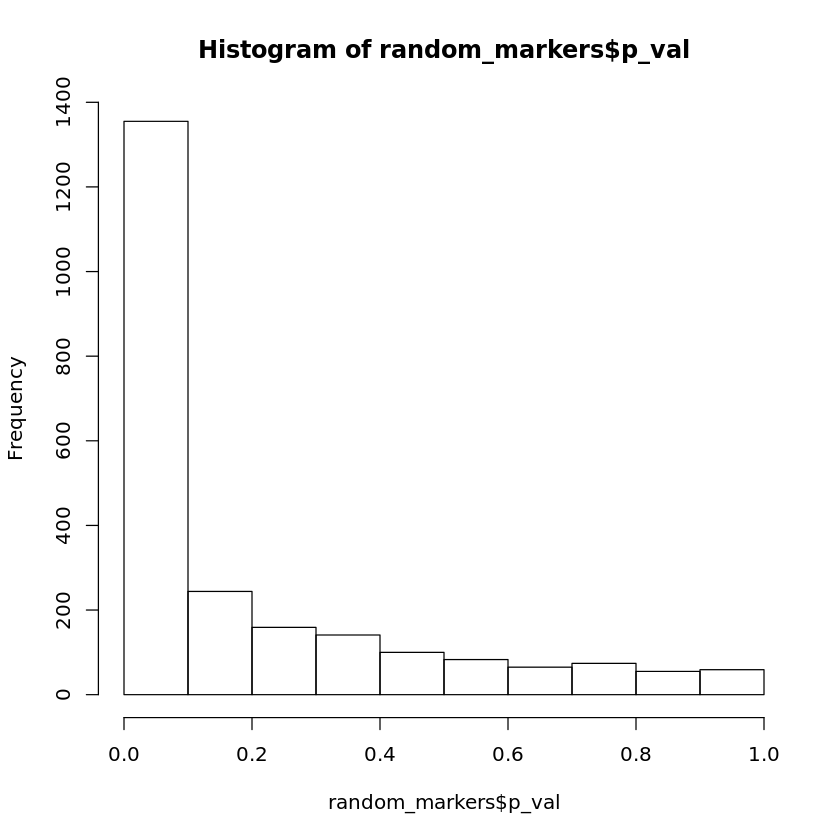

In [299]:
random_markers <- FindMarkers(
    pbmc, 
    ident.1 = 'Memory CD4 T', 
    ident.2 = 'Naive CD4 T',
    min.pct=0.1,
    test.use='t',
    logfc.threshold = 0.0)
hist(random_markers$p_val)
write.csv(random_markers, '/data/parameter_estimation/pbmc3k_calibration/cd4_t.csv')

### Run the same thing on shuffled data

In [24]:
shuffled_pbmc <- subset(pbmc, idents = c('Naive CD4 T', 'Memory CD4 T'))

In [28]:
Idents(shuffled_pbmc) = sample(c('Memory CD4 T', 'Naive CD4 T'), size=dim(pbmc)[2], replace=TRUE)

Assuming data assay in position 1, with name et is log-transformed.


Done!

Combining coefficients and standard errors

Warning message in melt(coefAndCI, as.is = TRUE):
“The melt generic in data.table has been passed a array and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(coefAndCI). In the next version, this warning will become an error.”
Calculating log-fold changes

Warning message in melt(lfc):
“The melt generic in data.table has been passed a list and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::

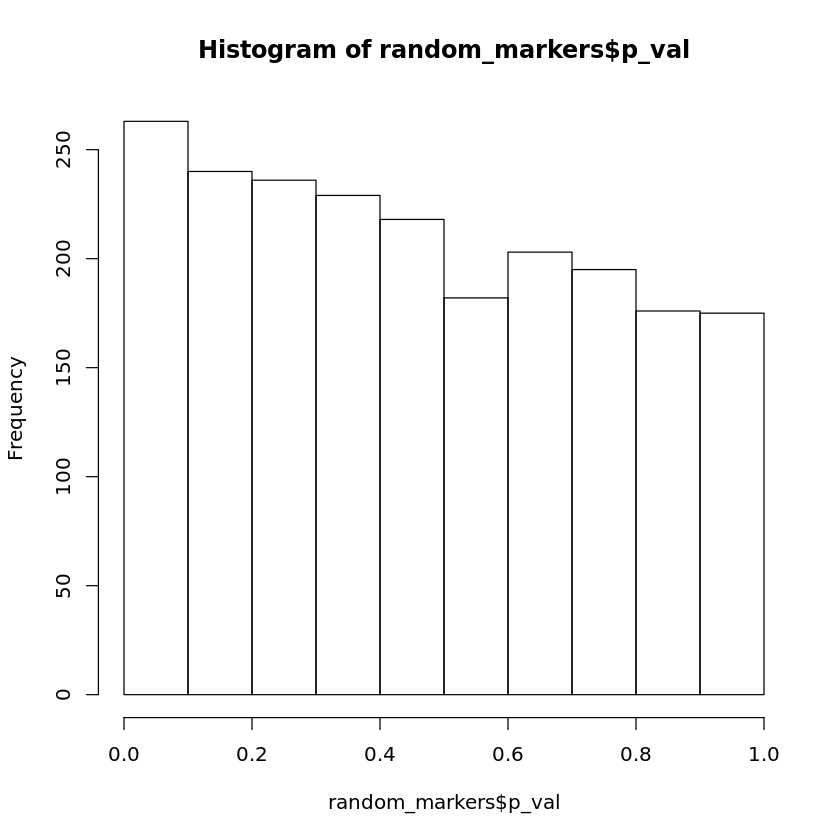

In [30]:
random_markers <- FindMarkers(
    shuffled_pbmc, 
    ident.1 = 'Memory CD4 T', 
    ident.2 = 'Naive CD4 T',
    min.pct=0.1,
    test.use='MAST',
    logfc.threshold = 0.0)
hist(random_markers$p_val)
write.csv(random_markers, '/data/parameter_estimation/pbmc3k_calibration/cd4_MAST_shuffled.csv')

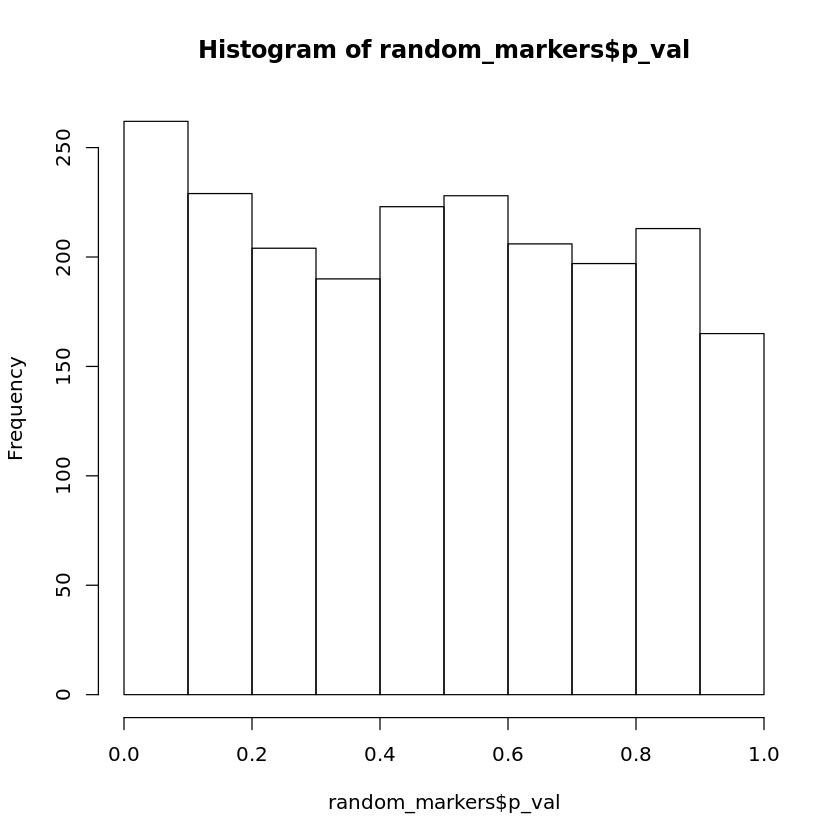

In [33]:
Idents(shuffled_pbmc) = sample(c('Memory CD4 T', 'Naive CD4 T'), size=dim(pbmc)[2], replace=TRUE)
random_markers <- FindMarkers(
    shuffled_pbmc, 
    ident.1 = 'Memory CD4 T', 
    ident.2 = 'Naive CD4 T',
    min.pct=0.1,
    test.use='t',
    logfc.threshold = 0.0)
hist(random_markers$p_val)
write.csv(random_markers, '/data/parameter_estimation/pbmc3k_calibration/cd4_t_shuffled.csv')

converting counts to integer mode

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



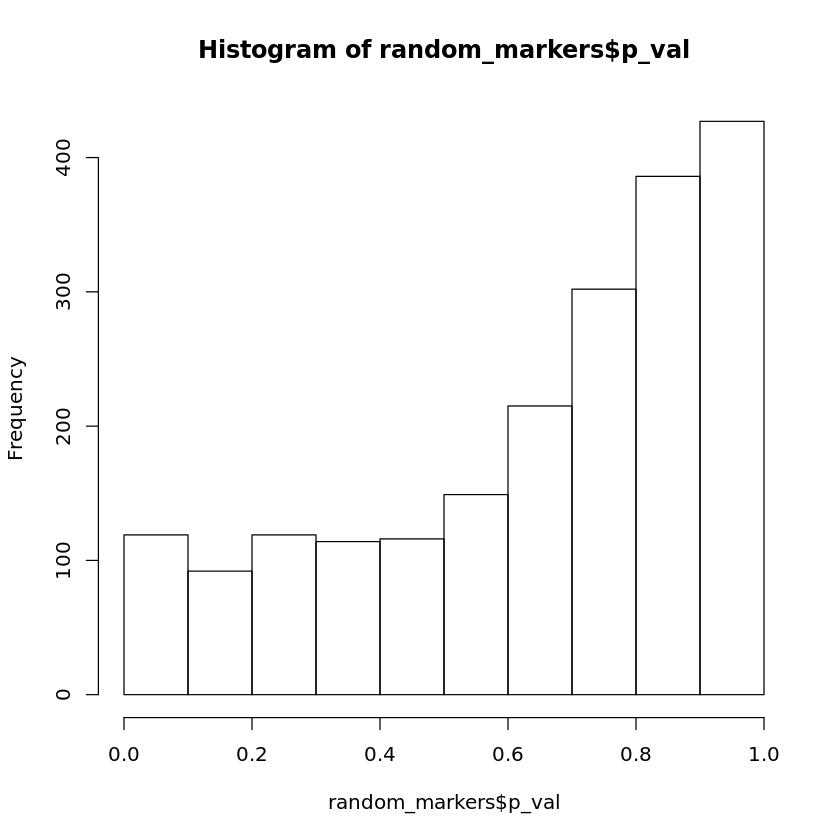

In [32]:
Idents(shuffled_pbmc) = sample(c('Memory CD4 T', 'Naive CD4 T'), size=dim(pbmc)[2], replace=TRUE)
random_markers <- FindMarkers(
    shuffled_pbmc, 
    ident.1 = 'Memory CD4 T', 
    ident.2 = 'Naive CD4 T',
    min.pct=0.1,
    test.use='DESeq2',
    logfc.threshold = 0.0)
hist(random_markers$p_val)
write.csv(random_markers, '/data/parameter_estimation/pbmc3k_calibration/cd4_deseq2_shuffled.csv')